In [2]:
import pandas as pd 
import numpy as np
from keras.datasets import boston_housing #导入波士顿房价数据集


(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

### 单层线性网络预测房价

In [3]:
from keras.layers import *
from keras.models import Sequential, Model
from tensorflow import random
from sklearn.metrics import  mean_squared_error

np.random.seed(0) # 随机种子
random.set_seed(0)

# 单层线性层的网络结构（也就是线性回归）：无隐藏层，由于是数值回归预测，输出层没有用激活函数；
model = Sequential()
model.add(Dense(1,use_bias=False))  


model.compile(optimizer='adam', loss='mse')  # 回归预测损失mse


model.fit(train_x, train_y, epochs=1000,verbose=False)  # 训练模型
model.summary()

pred_y = model.predict(test_x)[:,0]

print("正确标签：",test_y)
print("模型预测：",pred_y )

print("实际与预测值的差异：",mean_squared_error(test_y,pred_y ))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
正确标签： [ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]
模型预测： [ 5.7905407 19.103935  22.303558  29.4067    23.599136  18.829319
 29.525255  25.243988  19.591068  21.946165  18.460178  22

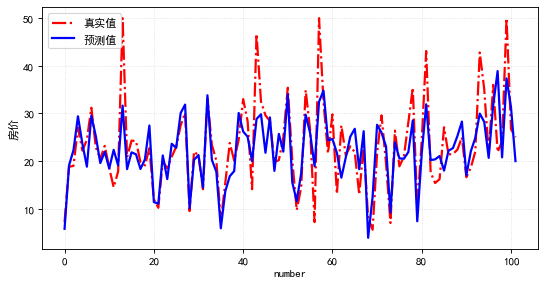

In [4]:
#绘图表示
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图形大小
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(range(len(test_y)), test_y, ls='-.',lw=2,c='r',label='真实值')
plt.plot(range(len(pred_y)), pred_y, ls='-',lw=2,c='b',label='预测值')

# 绘制网格
plt.grid(alpha=0.4, linestyle=':')
plt.legend()
plt.xlabel('number') #设置x轴的标签文本
plt.ylabel('房价') #设置y轴的标签文本

# 展示
plt.show()

In [21]:
feature_name = ['CRIM|住房所在城镇的人均犯罪率',
 'ZN|住房用地超过 25000 平方尺的比例',
 'INDUS|住房所在城镇非零售商用土地的比例',
 'CHAS|有关查理斯河的虚拟变量（如果住房位于河边则为1,否则为0 ）',
 'NOX|一氧化氮浓度',
 'RM|每处住房的平均房间数',
 'AGE|建于 1940 年之前的业主自住房比例',
 'DIS|住房距离波士顿五大中心区域的加权距离',
 'RAD|距离住房最近的公路入口编号',
 'TAX 每 10000 美元的全额财产税金额',
 'PTRATIO|住房所在城镇的师生比例',
 'B|1000(Bk|0.63)^2,其中 Bk 指代城镇中黑人的比例',
 'LSTAT|弱势群体人口所占比例',
 'MEDV|业主自住房的中位数房价（以千美元计）']
w0 = model.layers[0].get_weights()[0]
# 输出决策函数的形式
dfun = ''
for w ,fea in zip(w0,feature_name):
    dfun+=str(w)+ '*'+ fea + '+'
    
print(dfun)
    

[-0.09546997]*CRIM|住房所在城镇的人均犯罪率+[0.09558205]*ZN|住房用地超过 25000 平方尺的比例+[-0.01804003]*INDUS|住房所在城镇非零售商用土地的比例+[3.8479505]*CHAS|有关查理斯河的虚拟变量（如果住房位于河边则为1,否则为0 ）+[1.0180658]*NOX|一氧化氮浓度+[2.8623202]*RM|每处住房的平均房间数+[0.05667834]*AGE|建于 1940 年之前的业主自住房比例+[-0.47793597]*DIS|住房距离波士顿五大中心区域的加权距离+[0.20240606]*RAD|距离住房最近的公路入口编号+[-0.01002822]*TAX 每 10000 美元的全额财产税金额+[0.23102441]*PTRATIO|住房所在城镇的师生比例+[0.0190283]*B|1000(Bk|0.63)^2,其中 Bk 指代城镇中黑人的比例+[-0.66846687]*LSTAT|弱势群体人口所占比例+


## 深度神经网络预测房价

In [23]:
from keras.layers import *
from keras.models import Sequential, Model
from tensorflow import random
from sklearn.metrics import  mean_squared_error

np.random.seed(0) # 随机种子
random.set_seed(0)


# 网络结构：输入层的特征维数为13，1层relu隐藏层，线性的输出层；
model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu',use_bias=False))   # 隐藏层
model.add(Dense(1,use_bias=False))  


model.compile(optimizer='adam', loss='mse')  # 回归预测损失mse


model.fit(train_x, train_y, epochs=1000,verbose=False)  # 训练模型
model.summary()

pred_y = model.predict(test_x)[:,0]

print("正确标签：",test_y)
print("模型预测：",pred_y )

print("实际与预测值的差异：",mean_squared_error(test_y,pred_y ))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 10        
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
正确标签： [ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 

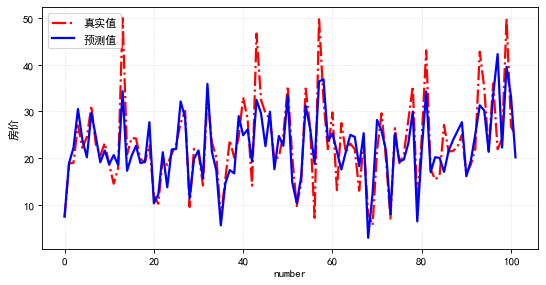

In [24]:
#绘图表示
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图形大小
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(range(len(test_y)), test_y, ls='-.',lw=2,c='r',label='真实值')
plt.plot(range(len(pred_y)), pred_y, ls='-',lw=2,c='b',label='预测值')

# 绘制网格
plt.grid(alpha=0.4, linestyle=':')
plt.legend()
plt.xlabel('number') #设置x轴的标签文本
plt.ylabel('房价') #设置y轴的标签文本

# 展示
plt.show()

In [42]:
from numpy import exp


x0=train_x[0]
print("1、输入第一条样本x0:\n", x0)

w0= model.layers[0].get_weights()[0] 
print("2、第一层网络的权重参数w0:\n", w0[:3],'...')  # 权重参数可以控制数据的特征表达再输出到下一层

a0 = np.maximum(0,np.dot(w0.T, x0)) 
print("3、经过第一层神经网络relu(w0*x0)后输出a0:\n",a0) # a0可以视为第一层网络层交互出的新特征，其特征含义是比较模糊的
w1=model.layers[1].get_weights()[0] 
print("4、第二层网络的权重参数w1:\n", w1)  
a1 = np.dot(w1.T,a0)                                   # 预测值为w1与ao加权求和
print("5、经过第二层神经网络w1*ao后输出预测值:%s,实际标签值为%s"%(a1[0],train_y[0]))  




1、输入第一条样本x0:
 [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
2、第一层网络的权重参数w0:
 [[-0.16263646 -0.33749306  0.03615189  0.04744884 -0.12909177  0.24638008
   0.02984359  0.5088429   0.01279008 -0.3826838 ]
 [-0.08980344  0.03859001  0.07381064 -0.13815537  0.34057978 -0.03152593
   0.10607474  0.16512388  0.34557223 -0.42499015]
 [ 0.04424414 -0.5848086   0.23124236  0.25747713  0.26661664  0.2120363
   0.20227864 -0.46231204 -0.42497548  0.25715792]] ...
3、经过第一层神经网络relu(w0*x0)后输出a0:
 [ 70.09896981   0.           0.           0.         336.81448645
  68.34481658 121.285138     0.          30.16801369   0.        ]
4、第二层网络的权重参数w1:
 [[-0.3117117 ]
 [-0.3397185 ]
 [ 0.5390298 ]
 [ 0.3905266 ]
 [ 0.4214618 ]
 [-0.30084056]
 [-0.6513426 ]
 [ 0.5517096 ]
 [-0.0838832 ]
 [-0.1673125 ]]
5、经过第二层神经网络w1*ao后输出预测值:18.014112015448397,实际标签值为15.2


In [34]:
train_y[0]

15.2



### xor

In [5]:
# 生成xor数据
xor_dataset = pd.DataFrame([[1,1,0],[1,0,1],[0,1,1],[0,0,0]],columns=['x0','x1','label'])

x,y = xor_dataset[['x0','x1']], xor_dataset['label']

xor_dataset.head()

,x0,x1,label
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


In [8]:
from keras.layers import *
from keras.models import Sequential, Model
from tensorflow import random

np.random.seed(0) # 随机种子
random.set_seed(0)

model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu',use_bias=False))   # 隐藏层
model.add(Dense(1, activation='sigmoid',use_bias=False))  # 输出层

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy')  


x,y = xor_dataset[['x0','x1']], xor_dataset['label']
model.fit(x, y, epochs=100000,verbose=False)  # 训练模型


print("正确标签：",y.values)
print("模型预测：",model.predict(x).round())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
正确标签： [0 1 1 0]
模型预测： [[0.]
 [1.]
 [1.]
 [0.]]


In [29]:
from numpy import exp

# 样本 0 ，1  实际标签为 1
x0=np.array([[0],[1]])
print("1、输入第一条样本x0:\n", x0)

w0= model.layers[0].get_weights()[0] 
print("2、第一层网络的权重参数w0:\n", w0)  # 权重参数可以控制数据的特征表达再输出到下一层

a0 = np.maximum(0,np.dot(w0.T,x0)) 
print("3、经过第一层神经网络relu(w0*x0)后输出:\n",a0)

w1=model.layers[1].get_weights()[0] 
print("4、第二层网络的权重参数w1:\n", w1)

a1 = 1 / (1 + exp(-(np.dot(w1.T,a0))))
print("5、经过第二层神经网络sigmoid(w1*ao)后输出预测值:%s,实际标签值为1"%round(a1[0][0]))


1、输入第一条样本x0:
 [[0]
 [1]]
2、第一层网络的权重参数w0:
 [[-2.8774085  -0.4149777  -2.2751505   2.2393308  -0.11784005  4.4763694
   0.6591073   4.6709948   3.3166747  -0.5298017 ]
 [ 2.8773866  -0.00697785  2.2751205  -2.2393568  -0.11240411  0.21747488
   0.13351911 -4.6710396   0.23107927 -0.5883722 ]]
3、经过第一层神经网络relu(w0*x0)后输出:
 [[2.87738657]
 [0.        ]
 [2.2751205 ]
 [0.        ]
 [0.        ]
 [0.21747488]
 [0.13351911]
 [0.        ]
 [0.23107927]
 [0.        ]]
4、第二层网络的权重参数w1:
 [[ 3.2121634 ]
 [-0.24692306]
 [ 4.154376  ]
 [ 3.6602545 ]
 [ 0.21435153]
 [-2.5486593 ]
 [-1.4541844 ]
 [ 6.4978595 ]
 [-2.6681948 ]
 [-0.1673125 ]]
5、经过第二层神经网络sigmoid(w1*ao)后输出预测值:1,实际标签值为1


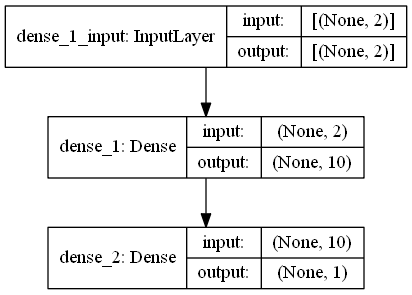

In [10]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True)

In [18]:
model.save('xor_model2.h5',save_format='h5')